In [12]:
# script to load dicom images and save as nifty files
# by Yijun

import glob
import nibabel as nib
import pydicom as dicom
import matplotlib.pyplot as plt

(320, 260)


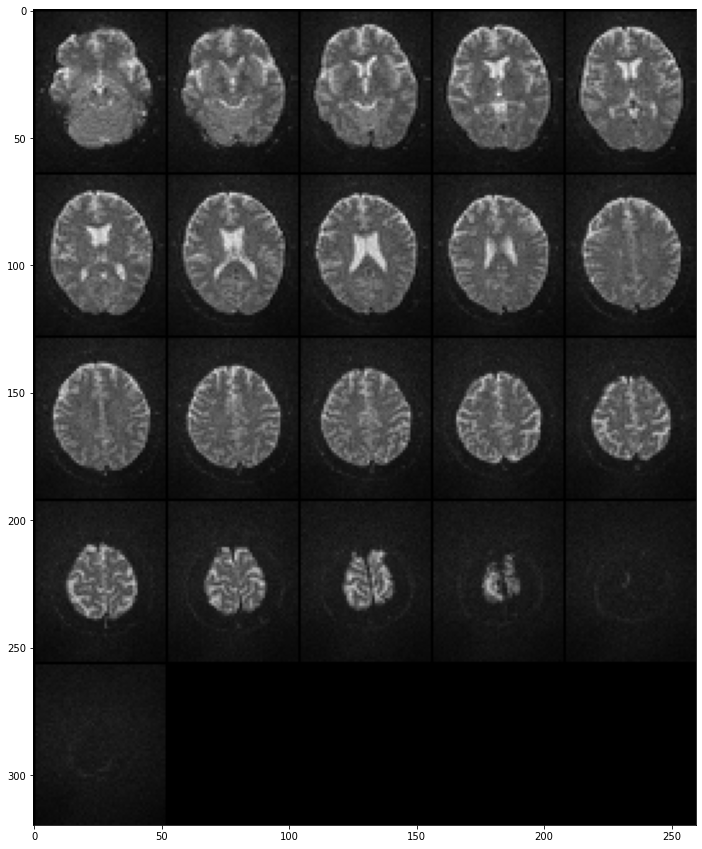

In [7]:
# fMRI
data_root = '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/'
sess = 'EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003';
data_path = data_root+sess+'/'+'VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0046.2022.11.16.17.06.14.840851.111248269.IMA'
ds = dicom.dcmread(data_path)
print(ds.pixel_array.shape)
plt.figure(figsize=(15, 15));
plt.imshow(ds.pixel_array, cmap="gray");

In [14]:
# metadata
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 182
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.18.41185.30000022111700594268400000166
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.2
(0002, 0013) Implementation Version Name         SH: 'MR_VE11S'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM', 'MOSAIC']
(0008, 0012) Instance Creation Date              DA: '20221116'
(0008, 0013) Instance Creation Time              TM: '162151.539000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 00

In [13]:
# task fMRI
files = glob.glob(data_root+sess+'/'+'VOL504_PNS.MR.SOPHIA_LIBRARY.0003.00[0-9]*.2022.11.16.17.06.14.840851.[0-9]*.IMA')
files_sorted = sorted(files)
files_sorted

['/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003/VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0001.2022.11.16.17.06.14.840851.111246503.IMA',
 '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003/VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0002.2022.11.16.17.06.14.840851.111246542.IMA',
 '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003/VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0003.2022.11.16.17.06.14.840851.111246581.IMA',
 '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003/VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0004.2022.11.16.17.06.14.840851.111246620.IMA',
 '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP2D_BOLD_4MM_TR3000_ACTIVE_6MIN_SENSATION_NO_MOVEMENT_0003/VOL504_PNS.MR.SOPHIA_LIBRARY.0003.0005.2022.11.16.17.06.14.840851.111246659.IMA',
 '/Users/neo/Brain/Low_field/data/PNS_fMRI_1116/EP

In [ ]:


# T1w
# files = glob.glob('/hd2/research/EEG-fMRI/data/Low_field_fMRI/VOL180_1.MR.0001.0[0-9]*.2021.11.19.15.19.09.841301.[0-9]*.IMA')



In [15]:
print(len(files_sorted))

99


In [ ]:
# stack the fMRI dicom files to a 4D array
import numpy as np

d1_ori, d2_ori = 320, 320
d1, d2, d3, d4 = 64, 64, 25, 80
    
im_4d = np.zeros([d1, d2, d3, d4])

files_sorted = sorted(files)

for k in np.arange(80):
    print(k)
    print(files_sorted[k])
    
    ds = dicom.dcmread(files_sorted[k]);
    im = ds.pixel_array;
    im_3d = np.zeros([d1, d2, d3])
    row_start, col_start = 0, 0

    for i in np.arange(d3):
        if col_start == d2_ori:
            col_start = 0
            row_start = row_start + 64

        im_3d[:, :, i] = np.flipud(im[row_start: row_start + d1, col_start: col_start + d2]).T
        col_start = col_start + d2
        
    im_4d[:, :, :, k] = im_3d
    

In [ ]:
nib.save(im_4d_nifti, '/hd2/research/EEG-fMRI/code/low_field_exp/output/task.nii')
# task_fmri_path = '/hd2/research/EEG-fMRI/code/low_field_exp/output/task.nii'

In [ ]:
# load corresponding dicom files, this is to check metadata
# T1w
ds = dicom.dcmread('/hd2/research/EEG-fMRI/data/Low_field_fMRI/VOL180_1.MR.0001.0064.2021.11.19.15.19.09.841301.50903234.IMA')


In [ ]:
# stack the anatomical MRI dicom files to a 3D array
import numpy as np

d1_ori, d2_ori = 160, 160
d1, d2, d3 = 128, 160, 160
    
im_3d = np.zeros([d1, d2, d3])

files_sorted = sorted(files)

for k in np.arange(d1):
    print(k)
    print(files_sorted[k])
    
    ds = dicom.dcmread(files_sorted[k]);
    im = ds.pixel_array;
    
    im_3d[k, :, :] = np.flipud(im).T
        

In [ ]:
# save as nifty file
im_3d_nifti = nib.Nifti1Image(im_3d, affine=np.eye(4))
nib.save(im_3d_nifti, '/hd2/research/EEG-fMRI/code/low_field_exp/output/T1.nii')